# Scratch Deep neural network.
Last time, we created a three-layer neural network, but this time we will rewrite it into one that can easily be expanded to an arbitrary number of layers. After that, we will be able to deal with advanced functions, activation functions, initial values, and optimization methods.

By doing this from scratch, we aim to give you an idea of the inner workings of the various frameworks that we will be using.

The name should be changed from Scratch Deep Neural Network Classifier class.

##  Classifying layers, etc.
By putting them in a class, we will make the implementation easy to change the configuration.

### Places to modify

* Number of layers
* Layer type (other types of layers such as convolutional layers will appear in the future)
* Types of activation functions
* Weight and bias initialization method
* Optimization method

To do this, we create classes for all the coupling layers, for the various activation functions, for the initialisation of weights and biases, and for each of the optimisation methods.

You can implement it freely, but here is a simple example. Create an instance of the fully connected layer and activation function as in sample code 1, and use it as in sample code 2 and 3. Each class will be explained later.

# [Problem 1] Classifying fully connected layers
Please classify the fully connected layer.

Below is a template. Initialize weights and bias in the constructor, and prepare forward and backward methods. By holding the weight W, the bias B, and the forward input X as instance variables, complicated input/output becomes unnecessary.

You can also pass an instance as an argument. Therefore, if you receive the instance initializer of the initialization method in the constructor, it will be initialized. You can change the initialization method by changing the instance to be passed.

You can also pass your self as an argument. You can use this to update the layer weights like self.optimizer.update(self) There are multiple values required for the update, but all can be instance variables of the fully connected layer.

The initialization method and the class of optimization methods are described later.

In [39]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
class FC:
     """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2
    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
     def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.W = initializer.W(self.n_nodes1, self.n_nodes2)
        self.B = initializer.B(self.n_nodes2)
        self.optimizer = optimizer
        self.HW = 0
        self.HB = 0


     def forward(self, X):
        """
        forward
        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """
        self.Z = X
        self.A = X @ self.W + self.B
        return self.A


     def backward(self, dA):

       """
        Backward
        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward
        """
       self.dB = np.sum(dA, axis=0)
       self.dW = self.Z.T @ dA
       self.dZ = dA @ self.W.T
       self = self.optimizer.update(self)

       return self.dZ

# [Problem 2] Classifying the initialization method
Classify the initialization code.

As mentioned above, we will be able to pass an instance of the initialization method to the constructor of the fully connected layer. Please add the necessary code to the following template. By receiving the standard deviation value (sigma) in the constructor, it is not necessary to pass this value (sigma) in the class of the fully connected layer.

The initialization method we have been dealing with so far will be named the SimpleInitializer class.

In [ ]:
class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution
    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma
    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B :
        """
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

# [Problem 3] Classifying optimization methods
Please classify the optimization method.

With respect to the optimization method, it is passed as an instance to the fully connected layer as well as the initialization method. When backward, we can update it as self.optimizer.update(self). Please add the necessary code to the following template.

The optimization methods we have dealt with so far are created as SGD class (Stochastic Gradient Descent).

In [ ]:
class SGD:
    """
    Stochastic gradient descent
    Parameters
    ----------
    lr : Learning rate
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        """
         Update weights and biases for a layer
        Parameters
        ----------
        layer : Instance of the layer before update
        """
        layer.W -= self.lr * layer.dW / len(layer.Z)
        layer.B -= self.lr * layer.dB / len(layer.Z)

        return layer

# [Problem 4] Classifying activation functions
Please classify the activation function.

The backpropagation of the softmax function is simplified by implementing it including the calculation of the cross entropy error.

## Evolutionary element
We will implement other than the activation functions, initial values of weights, and optimization methods that we have not seen so far.


In [ ]:
class Sigmoid:

    def forward(self, A):
        self.A = A
        Z = 1 / (1 + np.exp(-self.A))
        return Z

    def backward(self, dZ):
        dA = dZ * ((1 / (1 + np.exp(-self.A))) - (1 / (1 + np.exp(-self.A)))**2)
        return dA
class Tanh:

    def forward(self, A):
        self.A = A
        Z = np.tanh(self.A)
        return Z

    def backward(self, dZ):
        dA = dZ * (1 - np.tanh(self.A)**2)
        return dA
class softmax:

    def forward(self, A):
        Z = np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)
        return Z

    def backward(self, Z, y):
        dA = Z - y
        loss = - np.sum(y * np.log(Z)) / len(y)
        return dA, loss

# [Problem 5] ReLU class creation
Please implement ReLU (Rectified Linear Unit) which is a commonly used activation function as ReLU class.

ReLU is the following formula.
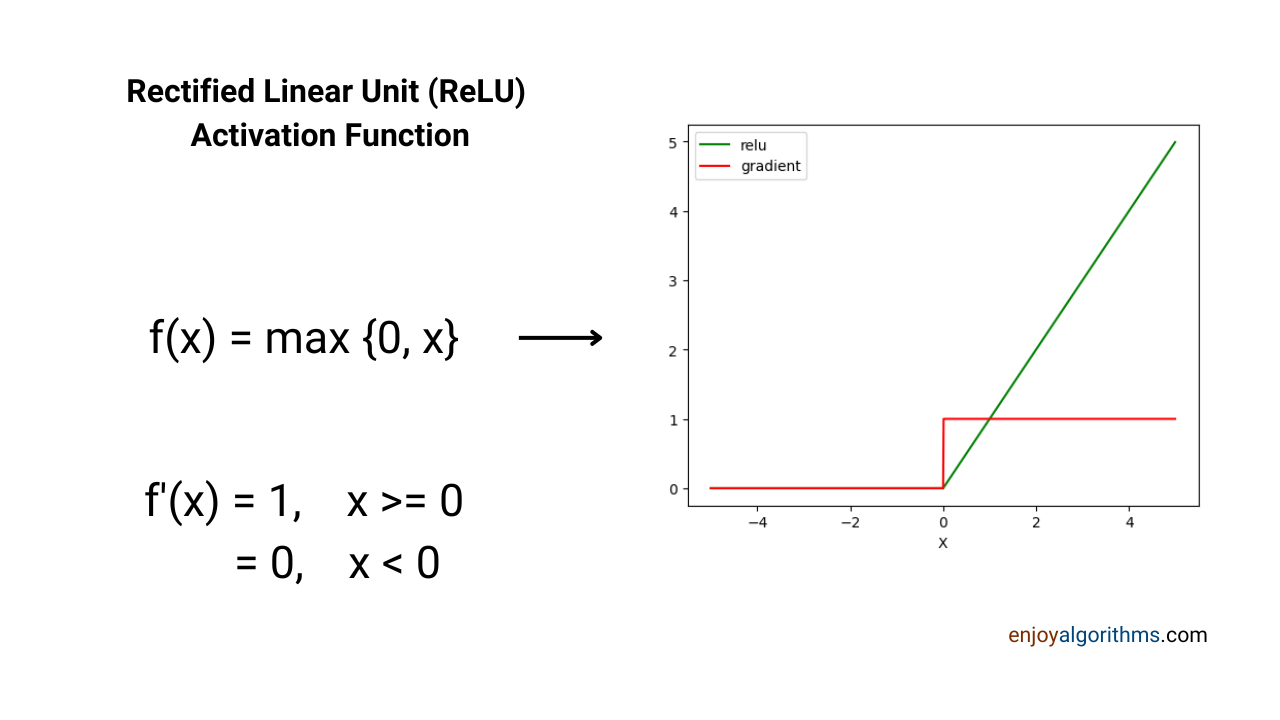

In practice, it is possible to usenp.maximumto sum over arrays.
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.maximum.html

In [ ]:
class ReLU:

    def forward(self, A):
        self.A = A
        Z = np.maximum(0, A)
        return Z

    def backward(self, dZ):
        dA = dZ * np.where(self.A > 0, 1, 0)
        return dA

# [Problem 6] Initial value of weight
So far, the initial values of weights and bias have been simply Gaussian distributions, and standard deviation has been treated as a hyperparameter. However, it is known what value it should be. For sigmoidal and hyperbolic tangent functions, the initial value of Xavier (or the initial value of Glorot) is used, and for ReLU the initial value of He.

Create XavierI nitializer class and HeIn itializer class.
Xavier


HeIn
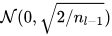

http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf

In [ ]:
class XavierInitializer:

    def __init__(self, sigma):
        _ = sigma

    def W(self, n_nodes1, n_nodes2):
        self.sigma = 1 / np.sqrt(n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

In [ ]:
class HeInitializer:

    def __init__(self, sigma):
        _ = sigma

    def W(self, n_nodes1, n_nodes2):
        self.sigma = np.sqrt(2 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

## [Problem 7] Optimization Method

The most common method in optimization is to **vary the learning rate** during the training process. Please create a class for **AdaGrad**, which is one of the basic methods.

### 🔁 First, review the SGD you’ve used so far:

\[
W_i' = W_i - \alpha \frac{\partial l}{\partial W_i}, \quad B_i' = B_i - \alpha \frac{\partial l}{\partial B_i}
\]

- \( \alpha \): Learning rate (can be layer-specific, but usually kept the same across layers)
- \( \frac{\partial l}{\partial W_i} \): Gradient of loss with respect to weight \( W_i \)
- \( \frac{\partial l}{\partial B_i} \): Gradient of loss with respect to bias \( B_i \)

---

### 🧮 Now, AdaGrad

> The **learning rate is adjusted per weight** during training.  
> The more a weight gets updated, the **smaller** its learning rate becomes.

AdaGrad keeps a running sum of the **squared gradients** for each weight:

\[
H_i' = H_i + \frac{\partial l}{\partial W_i} \odot \frac{\partial l}{\partial W_i}
\]

Then it updates the weight:

\[
W_i' = W_i - \alpha \left( \frac{1}{\sqrt{H_i'}} \odot \frac{\partial l}{\partial W_i} \right)
\]

- \( H_i \): Accumulated squared gradients for layer \( i \) (initially 0)
- \( \odot \): Element-wise multiplication
- \( H_i' \): Updated version of \( H_i \)

> The bias update formula is similar and can be implemented the same way.

---

### ✅ Key Concept

AdaGrad **adapts the learning rate** per weight:
- If a parameter gets **large gradients repeatedly**, its learning rate **shrinks**.
- This helps **stabilize training** and **prevents oscillation**.

http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf
---

### 🧪 Python Example

```python
class AdaGradOptimizer:
    def __init__(self, learning_rate=0.01, epsilon=1e-7):
        self.lr = learning_rate
        self.epsilon = epsilon
        self.h = {}  # cache for squared gradients

    def update(self, params, grads):
        for key in params.keys():
            if key not in self.h:
                self.h[key] = np.zeros_like(grads[key])
            self.h[key] += grads[key] ** 2
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + self.epsilon)


In [ ]:
class AdaGrad:

    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        layer.HW += layer.dW * layer.dW
        layer.HB += layer.dB * layer.dB
        delta = 1e-7
        layer.W -= self.lr * layer.dW / (np.sqrt(layer.HW) + delta) / len(layer.Z)
        layer.B -= self.lr * layer.dB / (np.sqrt(layer.HB) + delta) / len(layer.Z)
        return layer

# [Problem 8] Class completion
Complete the Scratch Deep Neural Netrowk Classifier class that can be trained and estimated with any configuration.

In [ ]:
class GetMiniBatch:

    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int64)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [ ]:
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activator=ReLU):
        self.verbose = verbose
        self.batch_size = 20
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_output = 10
        self.sigma = 0.02
        self.lr = 0.5
        self.epoch = epoch
        self.optimizer = optimizer
        self.initializer = initializer
        self.activator = activator

    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_train = []
        self.loss_val = []
        optimizer = self.optimizer(self.lr)
        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activator()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activator()
        self.FC3 = FC(self.n_nodes2, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation3 = softmax()

        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                A1 = self.FC1.forward(mini_X)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                #print(Z2.shape)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                dA3, loss = self.activation3.backward(Z3, mini_y)
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1)

            if self.verbose:
                A1 = self.FC1.forward(X)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                self.loss_train.append(self.activation3.backward(Z3, y)[1])

                if X_val is not None:
                    A1 = self.FC1.forward(X_val)
                    Z1 = self.activation1.forward(A1)
                    A2 = self.FC2.forward(Z1)
                    Z2 = self.activation2.forward(A2)
                    A3 = self.FC3.forward(Z2)
                    Z3 = self.activation3.forward(A3)
                    self.loss_val.append(self.activation3.backward(Z3, y_val)[1])

    def predict(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return np.argmax(Z3, axis=1)

# [Problem 9] Learning and estimation
Create several networks with varying numbers of layers and activation functions. Then, train and estimate the MNIST data and calculate the Accuracy.

* Initialize self.W and self.B using the initializer method
* Number of nodes Fully connected layer from n_nodes1 to n_nodes2
* The following forms of ndarray, shape (batch_size, n_nodes1)
* The following forms of ndarray, shape (batch_size, n_nodes2)
* initializer: instance of initialization method
* optimizer: instance of optimization method
* Simple initialization with Gaussian distribution
* Update weights and biases for a layer
* Instance of the layer before update
* Gradient flowing from behind
* Standard deviation of Gaussian distribution
* Number of nodes in the output layer
* Stochastic gradient descent
* Bias initialization
* Number of nodes in the previous layer
* Number of nodes in the later layer
* dZ0 is not used
* Weight initialization
* Gradient to flow forward
* Backward
* forward
* Initialize
* Learning rate
* output
* update

test

input

In [ ]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_train /= 255
X_test /= 255

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_val[:, np.newaxis])

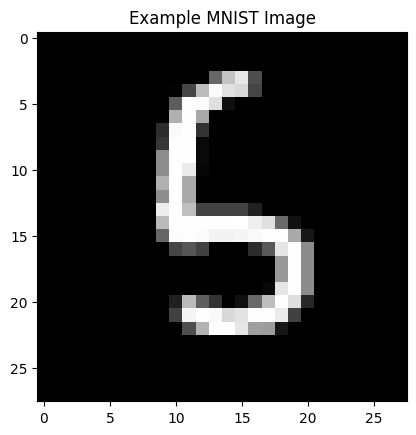

In [ ]:
# Display an example MNIST image before training
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28, 28),cmap='gray')
plt.title("Example MNIST Image")
plt.show()

SDNN = ScratchDeepNeuralNetrowkClassifier(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activator=ReLU)

SDNN.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)

In [ ]:
pred = SDNN.predict(X_val)
accuracy_score(y_val, pred)

0.9805

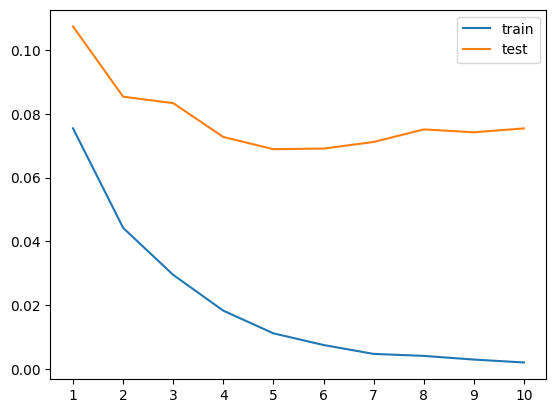

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(1, SDNN.epoch+1)), SDNN.loss_train, label='train')
plt.plot(list(range(1, SDNN.epoch+1)), SDNN.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN.epoch+1)));

In [ ]:
class ScratchDeepNeuralNetrowkClassifier_4():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU):
        self.verbose = verbose
        self.batch_size = 20
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_nodes3 = 150
        self.n_output = 10
        self.sigma = 0.02
        self.lr = 0.5
        self.epoch = epoch
        self.optimizer = optimizer
        self.initializer = initializer
        self.activater = activater

    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_train = []
        self.loss_val = []
        optimizer = self.optimizer(self.lr)

        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_nodes3, self.initializer(self.sigma), optimizer)
        self.activation3 = self.activater()
        self.FC4 = FC(self.n_nodes3, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation4 = softmax()

        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                self.forward(mini_X)
                self.backward(mini_y)

            if self.verbose:
                self.forward(X)
                self.loss_train.append(self.activation4.backward(self.Z4, y)[1])

                if X_val is not None:
                    self.forward(X_val)
                    self.loss_val.append(self.activation4.backward(self.Z4, y_val)[1])

    def forward(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        A4 = self.FC4.forward(Z3)
        self.Z4 = self.activation4.forward(A4)

    def backward(self, y):
        dA4, self.loss = self.activation4.backward(self.Z4, y)
        dZ3 = self.FC4.backward(dA4)
        dA3 = self.activation3.backward(dZ3)
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1)

    def predict(self, X):
        self.forward(X)
        return np.argmax(self.Z4, axis=1)

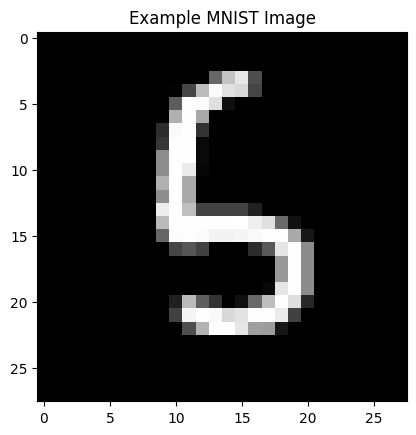

0.9796666666666667

In [ ]:
# Display an example MNIST image before training
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28, 28),cmap='gray')
plt.title("Example MNIST Image")
plt.show()

SDNN4 = ScratchDeepNeuralNetrowkClassifier_4(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU)
SDNN4.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)

pred = SDNN4.predict(X_val)
accuracy_score(y_val, pred)

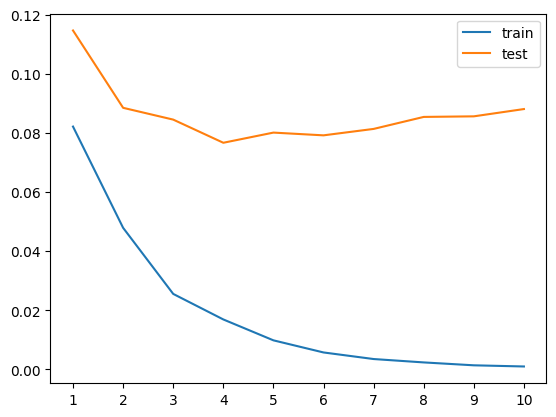

In [ ]:
plt.plot(list(range(1, SDNN4.epoch+1)), SDNN4.loss_train, label='train')
plt.plot(list(range(1, SDNN4.epoch+1)), SDNN4.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN4.epoch+1)));

In [ ]:
class ScratchDeepNeuralNetrowkClassifier_6():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU):
        self.verbose = verbose
        self.batch_size = 20
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_nodes3 = 150
        self.n_nodes4 = 100
        self.n_nodes5 = 50
        self.n_output = 10
        self.sigma = 0.02
        self.lr = 0.5
        self.epoch = epoch
        self.optimizer = optimizer
        self.initializer = initializer
        self.activater = activater

    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_train = []
        self.loss_val = []
        optimizer = self.optimizer(self.lr)

        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_nodes3, self.initializer(self.sigma), optimizer)
        self.activation3 = self.activater()
        self.FC4 = FC(self.n_nodes3, self.n_nodes4, self.initializer(self.sigma), optimizer)
        self.activation4 = self.activater()
        self.FC5 = FC(self.n_nodes4, self.n_nodes5, self.initializer(self.sigma), optimizer)
        self.activation5 = self.activater()
        self.FC6 = FC(self.n_nodes5, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation6 = softmax()

        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                self.forward(mini_X)
                self.backward(mini_y)

            if self.verbose:
                self.forward(X)
                self.loss_train.append(self.activation6.backward(self.Z6, y)[1])

                if X_val is not None:
                    self.forward(X_val)
                    self.loss_val.append(self.activation6.backward(self.Z6, y_val)[1])

    def forward(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        A4 = self.FC4.forward(Z3)
        Z4 = self.activation4.forward(A4)
        A5 = self.FC5.forward(Z4)
        Z5 = self.activation5.forward(A5)
        A6 = self.FC6.forward(Z5)
        self.Z6 = self.activation6.forward(A6)

    def backward(self, y):
        dA6, self.loss = self.activation6.backward(self.Z6, y)
        dZ5 = self.FC6.backward(dA6)
        dA5 = self.activation5.backward(dZ5)
        dZ4 = self.FC5.backward(dA5)
        dA4 = self.activation4.backward(dZ4)
        dZ3 = self.FC4.backward(dA4)
        dA3 = self.activation3.backward(dZ3)
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1)

    def predict(self, X):
        self.forward(X)
        return np.argmax(self.Z6, axis=1)

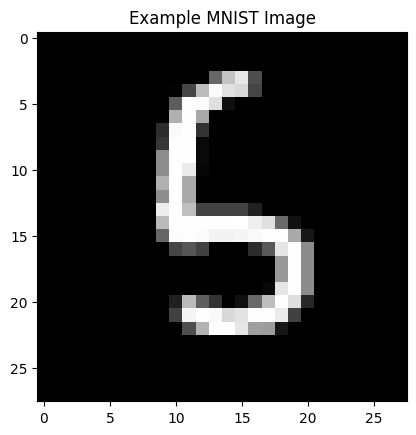

0.9815

In [ ]:
# Display an example MNIST image before training
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28, 28),cmap='gray')
plt.title("Example MNIST Image")
plt.show()

SDNN6 = ScratchDeepNeuralNetrowkClassifier_6(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU)
SDNN6.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)

pred = SDNN6.predict(X_val)
accuracy_score(y_val, pred)

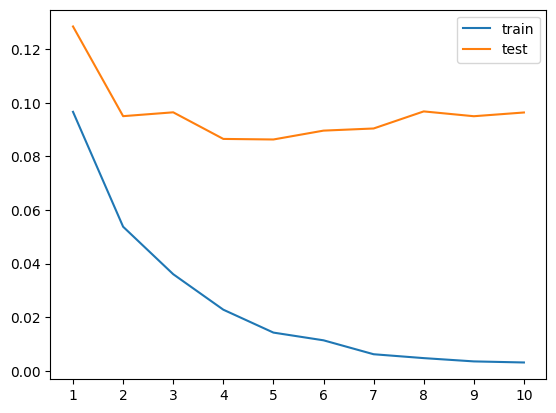

In [ ]:
plt.plot(list(range(1, SDNN6.epoch+1)), SDNN6.loss_train, label='train')
plt.plot(list(range(1, SDNN6.epoch+1)), SDNN6.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN6.epoch+1)));

In [ ]:
class General_ScratchDeepNeuralNetrowkClassifier():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU, n_nodes=None):
        self.verbose = verbose
        self.batch_size = 20
        self.sigma = 0.02
        self.lr = 0.5
        self.epoch = epoch
        self.optimizer = optimizer
        self.initializer = initializer
        self.activater = activater
        self.n_nodes = n_nodes

    def fit(self, X, y, X_val=None, y_val=None):
        self.loss_train = []
        self.loss_val = []
        optimizer = self.optimizer(self.lr)
        self.fcs = []
        self.act = []

        for i in range(len(self.n_nodes)-2):
            self.fcs.append(FC(self.n_nodes[i], self.n_nodes[i+1], self.initializer(self.sigma), optimizer))
            self.act.append(self.activater())
        self.fcs.append(FC(self.n_nodes[i+1], self.n_nodes[-1], self.initializer(self.sigma), optimizer))
        self.act.append(softmax())

        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                A = []
                Z = []
                for i, (f, a) in enumerate(zip(self.fcs, self.act)):
                    if i == 0:
                        A.append(f.forward(mini_X))
                        Z.append(a.forward(A[i]))
                    else:
                        A.append(f.forward(Z[i-1]))
                        Z.append(a.forward(A[i]))
                dA = []
                dZ = []
                for i, (f, a) in enumerate(zip(self.fcs[::-1], self.act[::-1])):
                    if i == 0:
                        dA.append(a.backward(Z[-(i+1)], mini_y)[0])
                        dZ.append(f.backward(dA[i]))
                    else:
                        dA.append(a.backward(dZ[i-1]))
                        dZ.append(f.backward(dA[i]))

            if self.verbose:
                A = []
                Z = []
                for i, (f, a) in enumerate(zip(self.fcs, self.act)):
                    if i == 0:
                        A.append(f.forward(X))
                        Z.append(a.forward(A[i]))
                    else:
                        A.append(f.forward(Z[i-1]))
                        Z.append(a.forward(A[i]))
                self.loss_train.append(self.act[-1].backward(Z[-1], y)[1])

                if X_val is not None:
                    A = []
                    Z = []
                    for i, (f, a) in enumerate(zip(self.fcs, self.act)):
                        if i == 0:
                            A.append(f.forward(X_val))
                            Z.append(a.forward(A[i]))
                        else:
                            A.append(f.forward(Z[i-1]))
                            Z.append(a.forward(A[i]))
                    self.loss_val.append(self.act[-1].backward(Z[-1], y_val)[1])

    def predict(self, X):
        A = []
        Z = []
        for i, (f, a) in enumerate(zip(self.fcs, self.act)):
            if i == 0:
                A.append(f.forward(X))
                Z.append(a.forward(A[i]))
            else:
                A.append(f.forward(Z[i-1]))
                Z.append(a.forward(A[i]))
        return np.argmax(Z[-1], axis=1)

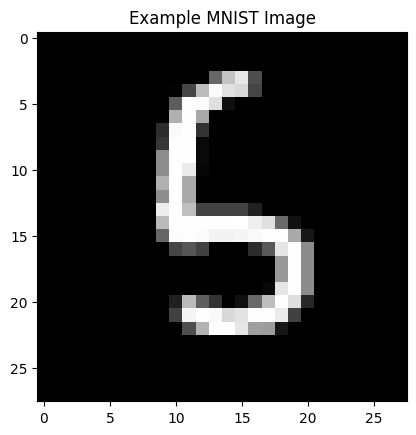

0.9794166666666667

In [ ]:
# Display an example MNIST image before training
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28, 28),cmap='gray')
plt.title("Example MNIST Image")
plt.show()

node_list = [784, 400, 200, 150, 100, 10]
SDNN5 = General_ScratchDeepNeuralNetrowkClassifier(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU, n_nodes=node_list)
SDNN5.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)
pred = SDNN5.predict(X_val)
accuracy_score(y_val, pred)

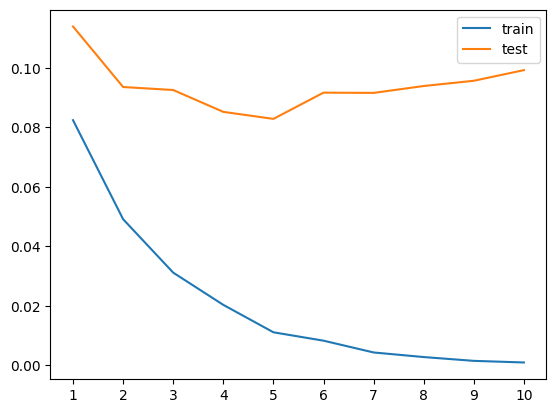

In [ ]:
plt.plot(list(range(1, SDNN5.epoch+1)), SDNN5.loss_train, label='train')
plt.plot(list(range(1, SDNN5.epoch+1)), SDNN5.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN5.epoch+1)));

# One or more MNIST images can be displayed

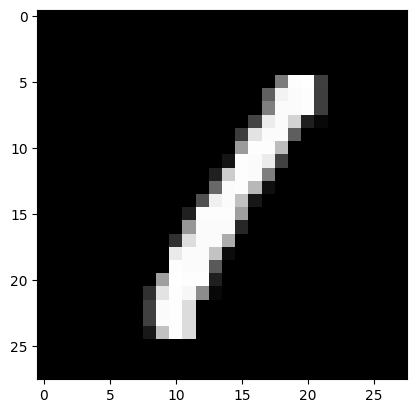

In [40]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3],cmap='gray')
plt.show()